In [1]:
import numpy as np
import copy as cp
import astropy.units as u
import matplotlib.pyplot as plt
%matplotlib inline

import thermal_evolution as te


In [2]:
data_directory = '/Users/kwame/Simulations/THERMAL/RE__Visit/NVB_C009_l20n1024_S12345TAB_thermal_evol'
data_filename_root = 'NVB_C009_l20n1024_S12345T'
data_filename_suffix = '_thermal_evol.dat'
data_legend = '/Users/kwame/Simulations/THERMAL/RE__Visit/legend_TAB.txt'

thermal_evolution_instance = te.ThermalEvolution(data_directory, data_filename_root, data_filename_suffix, data_legend)


In [11]:
thermal_evolution_instance.train_interpolator(2., use_parameter=[True, True, True])


In [ ]:
T0, gamma, filtering_length = [9.48173e+03, 1.38737e+04]*u.K , [1.516, 2.426], [80.836, 106.478]*u.kpc

print('A =', thermal_evolution_instance.predict_A(T0, gamma, filtering_length))
print('B =', thermal_evolution_instance.predict_B(T0, gamma, filtering_length))


In [14]:
plot_grid_shape = (100, 100)

plot_grid_T0 = np.linspace(3000., 27000., num=plot_grid_shape[0]) * u.K
plot_grid_gamma = np.linspace(0.7, 2.5, num=plot_grid_shape[0]) * u.dimensionless_unscaled
plot_grid_filtering = np.linspace(40., 170., num=plot_grid_shape[0]) * u.kpc

plot_grid_T0_fixed = np.ones(plot_grid_shape) #T0
plot_grid_gamma_fixed = np.ones(plot_grid_shape) #gamma
plot_grid_filtering_fixed = np.ones(plot_grid_shape) #filtering_length


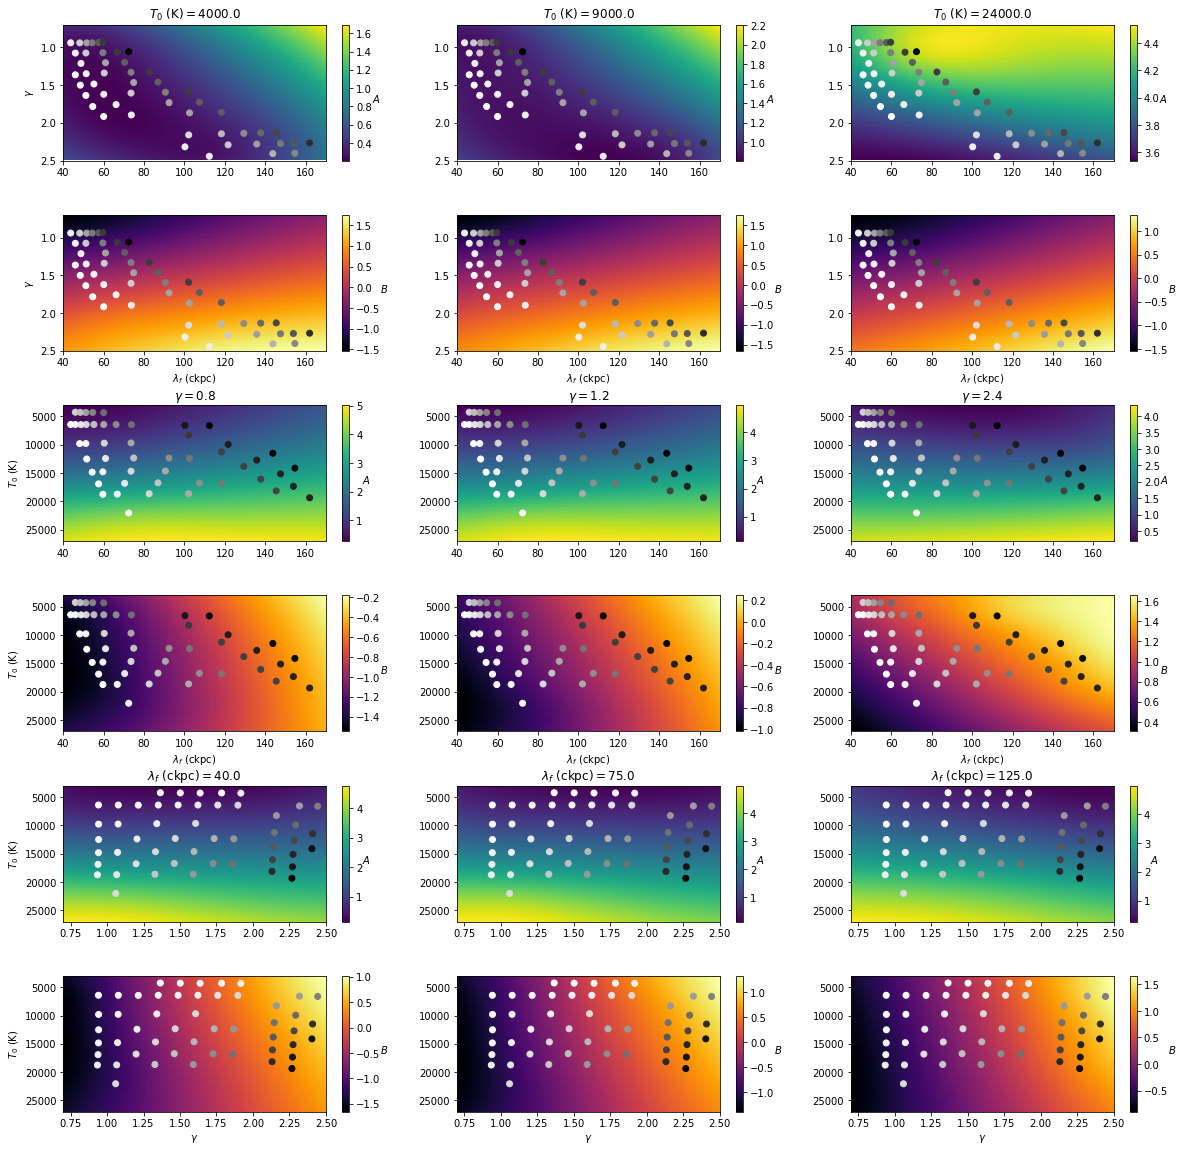

In [15]:
thermal_parameter_labels = [r'$T_0$ (K)', r'$\gamma$', r'$\lambda_f$ (ckpc)']
thermal_parameters_fixed_values = np.array([[4000., 9000., 24000.], [0.8, 1.2, 2.4], [40., 75., 125.]])
plot_grid_list = [plot_grid_T0.value, plot_grid_gamma.value, plot_grid_filtering.value]
n_sub_rows = 2

fig, axes = plt.subplots(nrows=len(plot_grid_list)*n_sub_rows, ncols=3, figsize=[20., 20.])
plt.subplots_adjust(hspace=0.4)

for i in range(len(plot_grid_list)):
    for j in range(axes.shape[1]):
        for k in range(2):
            parameter_indices_that_vary = np.delete(np.arange(len(plot_grid_list)), i).astype(np.int)
            plot_grid_list_with_fixed_value = cp.deepcopy(plot_grid_list)
            plot_grid_list_with_fixed_value[i] = np.ones(plot_grid_shape) * thermal_parameters_fixed_values[i, j]
            plot_grid_list_with_fixed_value[parameter_indices_that_vary[0]] = plot_grid_list_with_fixed_value[parameter_indices_that_vary[0]][:, np.newaxis] * np.ones(plot_grid_shape)
            plot_grid_list_with_fixed_value[parameter_indices_that_vary[1]] = plot_grid_list_with_fixed_value[parameter_indices_that_vary[1]][np.newaxis, :] * np.ones(plot_grid_shape)

            if k == 0:
                im0 = axes[i * n_sub_rows, j].imshow(thermal_evolution_instance.predict_A(plot_grid_list_with_fixed_value), aspect='auto',
                                      extent=[np.min(plot_grid_list[parameter_indices_that_vary[1]]), np.max(plot_grid_list[parameter_indices_that_vary[1]]), np.max(plot_grid_list[parameter_indices_that_vary[0]]), np.min(plot_grid_list[parameter_indices_that_vary[0]])])
                cbar0 = fig.colorbar(im0, ax=axes[i * n_sub_rows, j])
                cbar0.set_label(r'$A$', rotation=0)

                scat0 = axes[i * n_sub_rows, j].scatter(thermal_evolution_instance.training_thermal_parameters_pivot_redshift[:, parameter_indices_that_vary[1]],
                                      thermal_evolution_instance.training_thermal_parameters_pivot_redshift[:, parameter_indices_that_vary[0]],
                                      c=thermal_evolution_instance.training_thermal_parameters_pivot_redshift[:, i], cmap='Greys') #, norm=True)

                axes[i * n_sub_rows, j].set_title(thermal_parameter_labels[i] + r'$= %.1f$'%thermal_parameters_fixed_values[i, j])

            if k == 1:
                im1 = axes[i * n_sub_rows + 1, j].imshow(thermal_evolution_instance.predict_B(plot_grid_list_with_fixed_value), aspect='auto',
                                      extent=[np.min(plot_grid_list[parameter_indices_that_vary[1]]), np.max(plot_grid_list[parameter_indices_that_vary[1]]), np.max(plot_grid_list[parameter_indices_that_vary[0]]), np.min(plot_grid_list[parameter_indices_that_vary[0]])],
                                               cmap='inferno')
                cbar1 = fig.colorbar(im1, ax=axes[i * n_sub_rows + 1, j])
                cbar1.set_label(r'$B$', rotation=0)

                axes[i * n_sub_rows + 1, j].scatter(thermal_evolution_instance.training_thermal_parameters_pivot_redshift[:, parameter_indices_that_vary[1]],
                                      thermal_evolution_instance.training_thermal_parameters_pivot_redshift[:, parameter_indices_that_vary[0]],
                                           c=thermal_evolution_instance.training_thermal_parameters_pivot_redshift[:, i], cmap='Greys')

                axes[i * n_sub_rows + 1, j].set_xlabel(thermal_parameter_labels[parameter_indices_that_vary[1]])

        if j == 0:
            axes[i * n_sub_rows, j].set_ylabel(thermal_parameter_labels[parameter_indices_that_vary[0]])
            axes[i * n_sub_rows + 1, j].set_ylabel(thermal_parameter_labels[parameter_indices_that_vary[0]])
#cbar_scat0 = fig.colorbar(scat0, ax=axes[i * n_sub_rows + 2, j], orientation='horizontal')
#cbar_scat0.set_label(thermal_parameter_labels[i], rotation=0)
#axes[i * n_sub_rows + 2, j].axis('off')


In [ ]:
plot_grid_1 = plot_grid_T0
plot_grid_2 = plot_grid_filtering
plot_grid_fixed = plot_grid_gamma_fixed
plot_grid_list = [plot_grid_1.value, plot_grid_fixed.value, plot_grid_2.value]

plt.imshow(thermal_evolution_instance.predict_A(plot_grid_list), aspect='auto', extent=[np.min(plot_grid_2.value), np.max(plot_grid_2.value), np.max(plot_grid_1.value), np.min(plot_grid_1.value)])
plt.colorbar()

plt.scatter(thermal_evolution_instance.training_thermal_parameters_pivot_redshift[:, 2],
            thermal_evolution_instance.training_thermal_parameters_pivot_redshift[:, 0])


In [ ]:
plt.imshow(thermal_evolution_instance.predict_B(plot_grid_list), aspect='auto',
           extent=[np.min(plot_grid_2.value), np.max(plot_grid_2.value), np.max(plot_grid_1.value), np.min(plot_grid_1.value)],
          ) #vmin=-2., vmax=2.)
plt.colorbar()

plt.scatter(thermal_evolution_instance.training_thermal_parameters_pivot_redshift[:, 2],
            thermal_evolution_instance.training_thermal_parameters_pivot_redshift[:, 0])


In [ ]:
print(thermal_evolution_instance.input_parameters)
print(thermal_evolution_instance.thermal_parameters)


In [ ]:
plt.figure(figsize=[15., 15.])
plt.xlabel(r'A')
plt.ylabel(r'Filtering length (ckpc)')
#plt.ylabel(r'T_0 (K)')
#plt.ylabel(r'$\gamma$')
redshift = 4.
for simulation_index in range(thermal_evolution_instance.n_simulations):
    redshift_index = np.where(thermal_evolution_instance.thermal_parameters[simulation_index][:, 0] == redshift)
    #print(redshift_index)
    thermal_parameters_sim = thermal_evolution_instance.thermal_parameters[simulation_index][:, 3][redshift_index]
    #print(simulation_index, thermal_parameters_sim)
    #plt.scatter([simulation_index,] * thermal_parameters_sim.shape[0], thermal_parameters_sim)
    A_sim = thermal_evolution_instance.input_parameters[simulation_index, 1]
    B_sim = thermal_evolution_instance.input_parameters[simulation_index, 2]
    if thermal_parameters_sim is not []:
        plt.scatter(A_sim, thermal_parameters_sim, s=(B_sim+2.)*10.)
#plt.xlabel(r'Simulation index')
